In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import io
from matplotlib import style
import pathlib
import warnings
warnings.filterwarnings('ignore')
import wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [13]:
#Uploading the data
data_df = pd.read_csv('SMSSpam.csv', delimiter='\t',header=None, names=['Class', 'Text'])
data_df

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
data_df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
data_df.tail()

,Class,Text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [16]:
#To get the information about the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
#To get the description of dataset
data_df.describe()

,Class,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [18]:
#To get the number of rows and columns in the dataset
data_df.shape

(5572, 2)

In [19]:
#To get the data type of each column
data_df.dtypes

Class    object
Text     object
dtype: object

In [20]:
#To return a series containing counts of unique rows in the dataset
data_df['Class'].value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [21]:
data_df['Text'].value_counts()

Sorry, I'll call later                                                                                                                                         30
I cant pick the phone right now. Pls send a message                                                                                                            12
Ok...                                                                                                                                                          10
Okie                                                                                                                                                            4
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..                        4
                                                                                                                                                               ..
No. On the way home. So if n

In [22]:
#prinitng the length of the dataset
print("length of dataset: ", len(data_df))

length of dataset:  5572


Text(0, 0.5, 'Count')

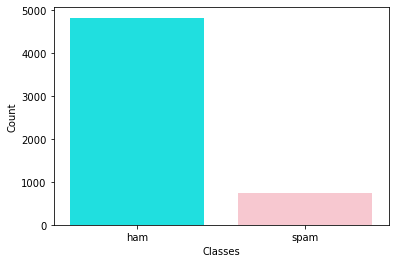

In [23]:
#To check whether the data is imbalanced or not
colus= ["#00FFFF", "#FFC0CB"] #colour palette
bar = sns.countplot(x= data_df["Class"], palette= colus)
bar.set_xlabel("Classes")
bar.set_ylabel("Count")

Here we can observe that the number of ham messages are more than spam messages. The data imbalance is quite evident.

In [24]:
#changing the data types to a specified data type in the dataset
data_df['spam'] = data_df['Class'].map( {'spam': 1, 'ham': 0} ).astype(int)
data_df.head()

,Class,Text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [25]:
#creating a column length
data_df['length'] = data_df['Text'].apply(len)

In [26]:
data_df.head()

,Class,Text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


<Figure size 432x288 with 0 Axes>

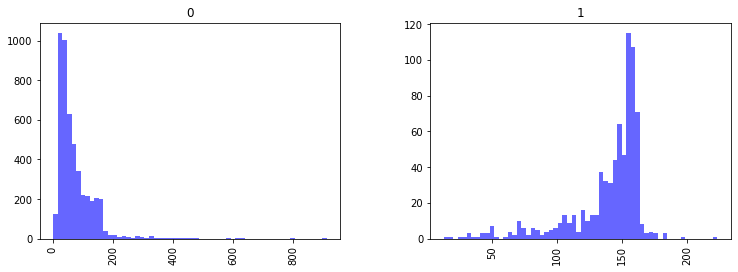

<Figure size 432x288 with 0 Axes>

In [27]:
#Displaying length of spam and ham messages
data_df.hist(column='length',by='spam',bins=60,figsize=(12,4),color='blue',alpha=0.6);
plt.figure()

Text(0.5, 0, 'Length of the Message')

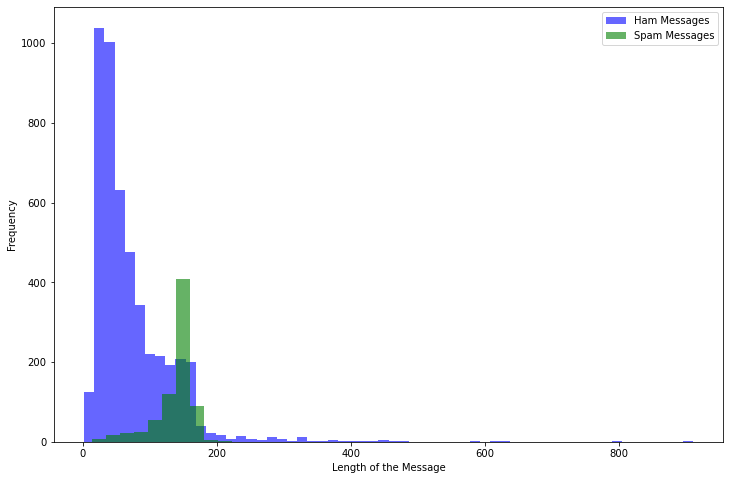

In [28]:
plt.figure(figsize=(12, 8))

data_df[data_df.Class=='ham'].length.plot(bins=60, kind='hist', color='blue', 
                                       label='Ham Messages', alpha=0.6)
data_df[data_df.Class=='spam'].length.plot(kind='hist', color='green', 
                                       label='Spam Messages', alpha=0.6)
plt.legend()
plt.xlabel("Length of the Message")

In [29]:
ham  = data_df[data_df['spam'] == 0].copy()
spam = data_df[data_df['spam'] == 1].copy()

In [30]:
!pip install --upgrade pip

In [31]:
!pip install --upgrade Pillow

In [32]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [33]:
def show_wordcloud(data, title):
    text = ' '.join(data_df['Text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',colormap='inferno', width=800, height=800).generate(text)
    
    plt.figure(figsize=(10,10))#, frameon=True
    plt.imshow(fig_wordcloud)  
    #plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

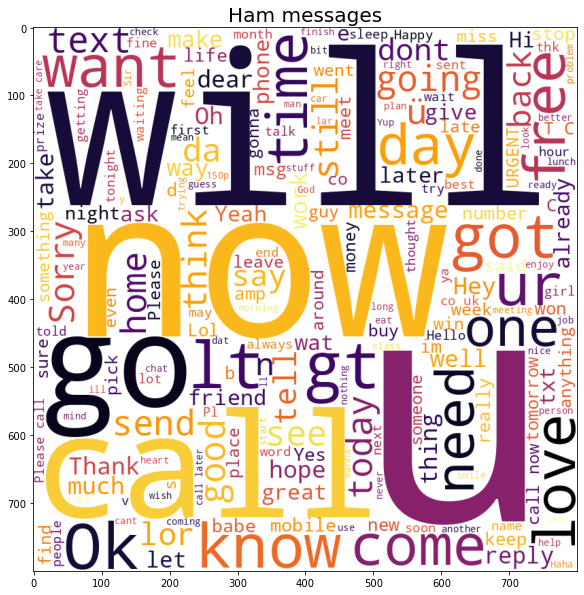

In [34]:
show_wordcloud(ham, "Ham messages")

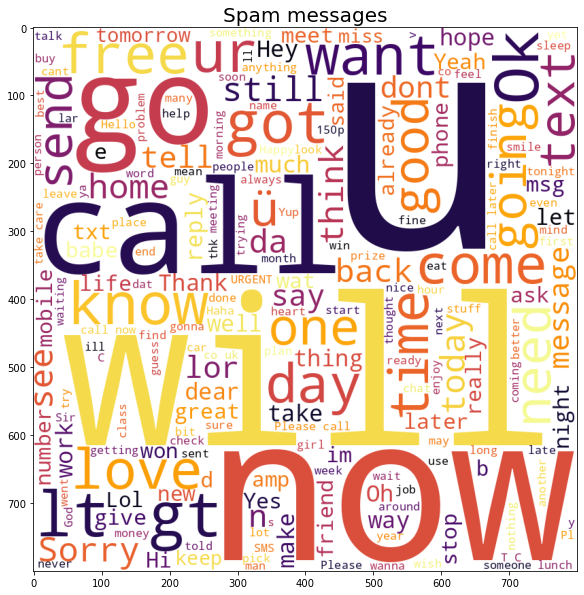

In [35]:
show_wordcloud(spam, "Spam messages")

In [36]:
import nltk

In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [39]:
#Exploring the data by creating more number of columns
data_df["No_of_Chars"] = data_df["Text"].apply(len) #Number of characters in the text
data_df["No_of_Wrds"]=data_df.apply(lambda row: nltk.word_tokenize(row["Text"]), axis=1).apply(len) #Number of words in the text
data_df["No_of_sents"]=data_df.apply(lambda row: nltk.sent_tokenize(row["Text"]), axis=1).apply(len) #Number of senetences in the etxt

In [40]:
data_df.head()

,Class,Text,spam,length,No_of_Chars,No_of_Wrds,No_of_sents
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,61,15,1


DATA PREPROCESSING

In [41]:
data_df = data_df[(data_df["No_of_Chars"]<350)]
data_df.shape

(5547, 7)

In [42]:
import re

In [43]:
#cleaning the data
def clean_data(Text):
#To Replace all non-alphabetic characters with a space
    text = re.sub('[^a-zA-Z]', ' ', Text)
#To convert text to lowercase
    text = text.lower() 
    text = text.split()
    text = ' '.join(text)
    return text

In [44]:
#Displaying the cleaned text
data_df["clean_text"] = data_df["Text"].apply(clean_data)
data_df["clean_text"].head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in a wkly comp to win fa cup final ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
Name: clean_text, dtype: object

In [45]:
#Tokenization
#splitting the sentence into words
data_df["Token_Text"]=data_df.apply(lambda row: nltk.word_tokenize(row["clean_text"]), axis=1)
data_df["Token_Text"].head()

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, a, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, don, t, think, he, goes, to, usf, he,...
Name: Token_Text, dtype: object

In [46]:
#Removing stopwords from the text
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
data_df["No_stopwordText"] = data_df["Token_Text"].apply(remove_stopwords)
data_df["No_stopwordText"].head()

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4       [nah, think, goes, usf, lives, around, though]
Name: No_stopwordText, dtype: object

In [49]:
lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

In [50]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat to
[

[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nlt

True

In [52]:
data_df["Lemma_Text"] = data_df["No_stopwordText"].apply(lemmatization)
data_df["Lemma_Text"].head()

0    [go, jurong, point, crazy, available, bugis, n...
1                         [ok, lar, joke, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, go, usf, live, around, though]
Name: Lemma_Text, dtype: object

In [53]:
corpus= []
for i in data_df["Lemma_Text"]:
    message = ' '.join([row for row in i])
    corpus.append(message)

In [54]:
corpus[:5]

['go jurong point crazy available bugis n great world la e buffet cine get amore wat',
 'ok lar joke wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though']

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [56]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
X.dtype

dtype('float64')

In [57]:
label_encoder = LabelEncoder()
data_df["Class"] = label_encoder.fit_transform(data_df["Class"])

In [58]:
import string

In [59]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
from nltk.corpus import stopwords
stopwords.words("english")[10:15]

["you've", "you'll", "you'd", 'your', 'yours']

In [62]:
# Defining a function to remove special characters and stop words from the text
def remove_punctuation_stopwords(message):
    
    message_without_punct = [ch for ch in message if ch not in string.punctuation]  # removing punctuation
     
    message_without_punct = "".join(message_without_punct).split()
    # removing stopwords
    message_without_punct_stopwords = \
        [word.lower() for word in message_without_punct if word.lower() not in stopwords.words("english")]
        
    return message_without_punct_stopwords

In [63]:
data_df['Text_clean'] = data_df['Text'].apply(remove_punctuation_stopwords)

In [64]:
data_df.head()

,Class,Text,spam,length,No_of_Chars,No_of_Wrds,No_of_sents,clean_text,Token_Text,No_stopwordText,Lemma_Text,Text_clean
0,0,"Go until jurong point, crazy.. Available only ...",0,111,111,24,2,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,0,29,29,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,155,37,2,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,0,49,49,13,1,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,61,15,1,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, live, around, though]","[nah, dont, think, goes, usf, lives, around, t..."


In [65]:
check = data_df['Text'].apply(remove_punctuation_stopwords)

In [66]:
check[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [67]:
check[1]

['ok', 'lar', 'joking', 'wif', 'u', 'oni']

VISUALIZATION after Preprocessing

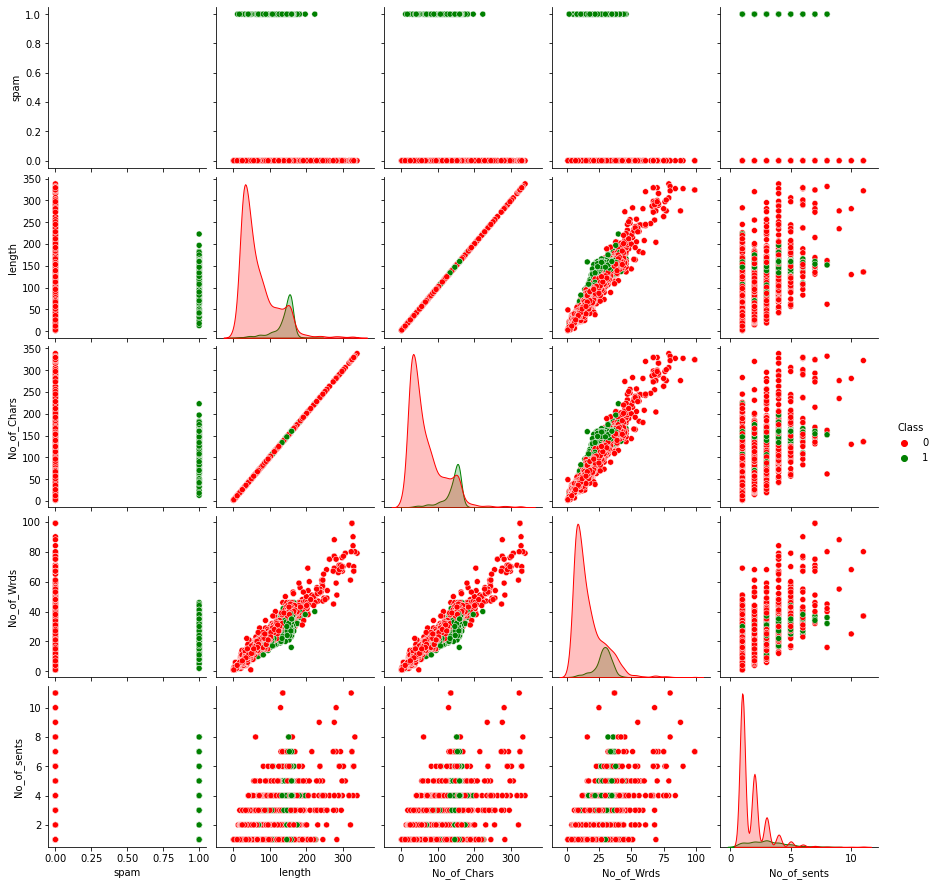

In [68]:
custom_palette = sns.color_palette(['red', 'green'])
sns.pairplot(data=data_df, hue="Class",palette=custom_palette)

In [69]:
from collections import Counter

In [70]:
spam.loc[:, 'Text'] = spam['Text'].apply(remove_punctuation_stopwords)
words_spam = spam['Text'].tolist()

In [71]:
list_spam_words = []
for sublist in words_spam:
    for item in sublist:
        list_spam_words.append(item)

In [72]:
c_spam = Counter(list_spam_words)
df_spamwords_top20 = pd.DataFrame(c_spam.most_common(20), columns=['word', 'count'])

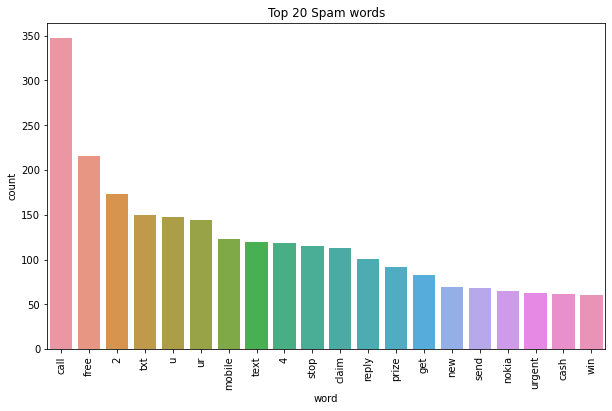

In [73]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df_spamwords_top20, ax=ax)
plt.title("Top 20 Spam words")
plt.xticks(rotation='vertical');

In [74]:
from tensorflow import keras
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer

In [77]:
bow_transformer = CountVectorizer(analyzer = remove_punctuation_stopwords).fit(data_df['Text'])

In [78]:
print(len(bow_transformer.vocabulary_))

9388


In [80]:
sample_spam = data_df['Text'][2]
bow_sample_spam = bow_transformer.transform([sample_spam])
print(sample_spam)

print(bow_sample_spam)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
  (0, 72)	1
  (0, 415)	1
  (0, 422)	1
  (0, 435)	1
  (0, 840)	1
  (0, 1228)	1
  (0, 2292)	1
  (0, 2511)	1
  (0, 3112)	2
  (0, 3247)	2
  (0, 3371)	1
  (0, 3525)	1
  (0, 5269)	1
  (0, 6637)	1
  (0, 6690)	1
  (0, 6747)	1
  (0, 8108)	1
  (0, 8266)	1
  (0, 8477)	1
  (0, 8976)	1
  (0, 9019)	1


In [81]:
print(bow_transformer.get_feature_names()[3152])
print(bow_transformer.get_feature_names()[3290])

eurodisinc
fantasy


In [83]:
# Applying the transformer to entire input data
bow_data = bow_transformer.transform(data_df['Text'])


In [84]:
print('Shape of Sparse Matrix: ', bow_data.shape)
print('Amount of Non-Zero occurences: ', bow_data.nnz)

Shape of Sparse Matrix:  (5547, 9388)
Amount of Non-Zero occurences:  49067


Sparsity refers to a matrix of numbers that includes many zeros or values that will not significantly impact a calculation.

In [85]:
sparsity = (100.0 * bow_data.nnz / (bow_data.shape[0] * bow_data.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

In [86]:
from sklearn.feature_extraction.text import TfidfTransformer

In [87]:
tfidf_transformer = TfidfTransformer().fit(bow_data)

In [88]:
data_tfidf = tfidf_transformer.transform(bow_data)

#Vectorization

In [89]:
#Need to convert the text into vectors
tf_vec=TfidfVectorizer()
features=tf_vec.fit_transform(data_df['Text'])

In [90]:
#Split feature and class
x=features
y=data_df['Class']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=7)

MODELS

#1.Naive Bayes

In [91]:
naiv=MultinomialNB()
naiv.fit(xtrain,ytrain)
pred=naiv.predict(xtest)

y_pred_prob = naiv.predict_proba(xtest)[:, 1]

Accuracy score 0.9615615615615616
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1520
           1       0.69      1.00      0.82       145

    accuracy                           0.96      1665
   macro avg       0.85      0.98      0.90      1665
weighted avg       0.97      0.96      0.96      1665

ROC_AUC Score : 0.99


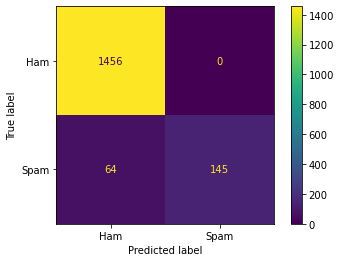

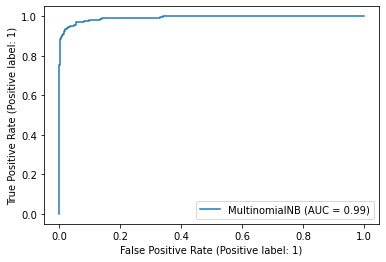

In [92]:
print('Accuracy score', accuracy_score(pred,ytest))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(pred,ytest))
# calculating ROC_AUC score of class predictions
print("ROC_AUC Score : {:.2f}".format(roc_auc_score(ytest,y_pred_prob)))
# Creating confusion matrix
dtcm = sklearn.metrics.confusion_matrix(ytest, pred)
dis = ConfusionMatrixDisplay(dtcm,display_labels=["Ham","Spam"])
dis.plot()
plot.show()
disp = plot_roc_curve(naiv, xtest, ytest)

#2.Random Forest

In [93]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
pred=rf.predict(xtest)

y_pred_prob = rf.predict_proba(xtest)[:, 1]

Accuracy score 0.9831831831831832
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1484
           1       0.87      1.00      0.93       181

    accuracy                           0.98      1665
   macro avg       0.93      0.99      0.96      1665
weighted avg       0.99      0.98      0.98      1665

ROC_AUC Score : 0.99


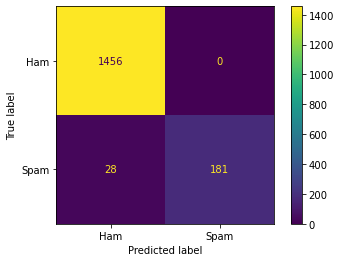

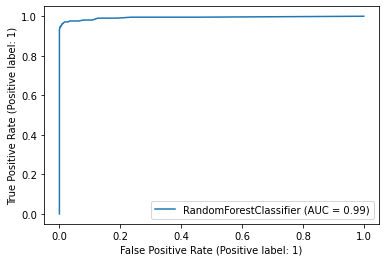

In [94]:
print('Accuracy score', accuracy_score(pred,ytest))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(pred,ytest))

# calculating ROC_AUC score of class predictions
print("ROC_AUC Score : {:.2f}".format(roc_auc_score(ytest,y_pred_prob)))
# Creating confusion matrix
dtcm = sklearn.metrics.confusion_matrix(ytest, pred)
dis = ConfusionMatrixDisplay(dtcm,display_labels=["Ham","Spam"])
dis.plot()
plot.show()
disp = plot_roc_curve(rf, xtest, ytest)

#3.KNN

In [95]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
pred=knn.predict(xtest)

y_pred_prob = knn.predict_proba(xtest)[:, 1]

Accuracy score 0.9087087087087087
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1608
           1       0.27      1.00      0.43        57

    accuracy                           0.91      1665
   macro avg       0.64      0.95      0.69      1665
weighted avg       0.98      0.91      0.93      1665

ROC_AUC Score : 0.95


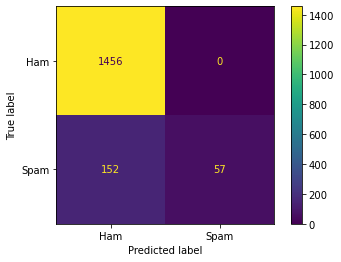

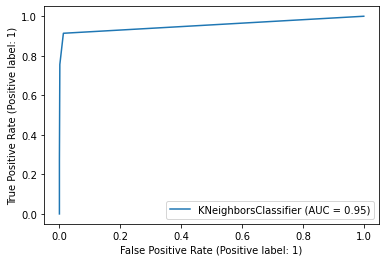

In [96]:
print('Accuracy score', accuracy_score(pred,ytest))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(pred,ytest))

# calculating ROC_AUC score of class predictions
print("ROC_AUC Score : {:.2f}".format(roc_auc_score(ytest,y_pred_prob)))
# Creating confusion matrix
dtcm = sklearn.metrics.confusion_matrix(ytest, pred)
dis = ConfusionMatrixDisplay(dtcm,display_labels=["Ham","Spam"])
dis.plot()
plot.show()
disp = plot_roc_curve(knn, xtest, ytest)

#4.SVC

In [97]:
svc = SVC(probability=True)
svc.fit(xtrain,ytrain)
pred=svc.predict(xtest)

y_pred_prob = svc.predict_proba(xtest)[:, 1]

Accuracy score 0.9807807807807808
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1488
           1       0.85      1.00      0.92       177

    accuracy                           0.98      1665
   macro avg       0.92      0.99      0.95      1665
weighted avg       0.98      0.98      0.98      1665

ROC_AUC Score : 1.00


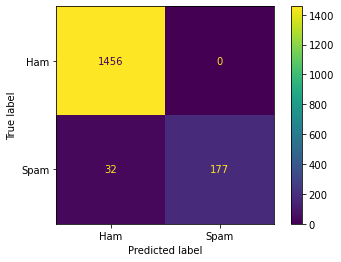

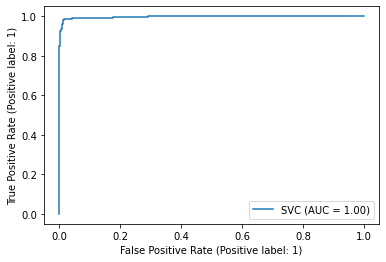

In [98]:
print('Accuracy score', accuracy_score(pred,ytest))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(pred,ytest))

# calculating ROC_AUC score of class predictions
print("ROC_AUC Score : {:.2f}".format(roc_auc_score(ytest,y_pred_prob)))
# Creating confusion matrix
dtcm = sklearn.metrics.confusion_matrix(ytest, pred)
dis = ConfusionMatrixDisplay(dtcm,display_labels=["Ham","Spam"])
dis.plot()
plot.show()
disp = plot_roc_curve(svc, xtest, ytest)

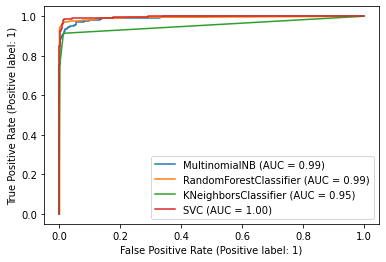

In [99]:
disp = plot_roc_curve(naiv, xtest, ytest)
plot_roc_curve(rf, xtest, ytest, ax=disp.ax_);
plot_roc_curve(knn, xtest, ytest, ax=disp.ax_)
plot_roc_curve(svc, xtest, ytest, ax=disp.ax_)